# Success
## image
## 2
## 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

(576, 1024, 3)
(506, 900, 3)


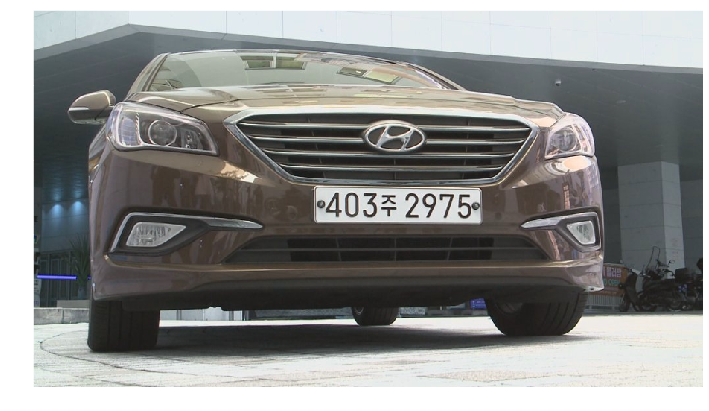

In [2]:
img_ori = cv2.imread('2.jpg')

height, width, channel = img_ori.shape
print(img_ori.shape)

if (900/img_ori.shape[0]) >= 3:
    img_ori = cv2.resize(img_ori, dsize=(0,0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC) #cv2.INTER_LINEAR
else:
    if img_ori.shape[0]<900:
        img_ori = cv2.resize(img_ori, dsize=(int(900.0),int(900.0 * height / width)), interpolation=cv2.INTER_CUBIC)
    else :
        img_ori = cv2.resize(img_ori, dsize=(int(900.0),int(900.0 * height / width)), interpolation=cv2.INTER_AREA)

height, width, channel = img_ori.shape
print(img_ori.shape)

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')

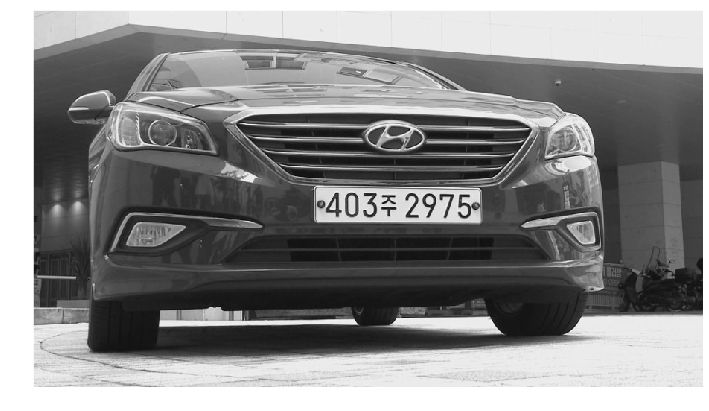

In [3]:
# hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
# gray = hsv[:,:,2]
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

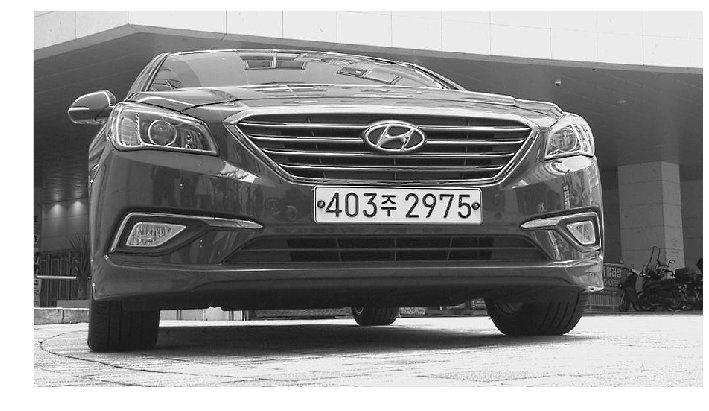

In [4]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

(506, 900)
377 237
602 239
379 283
603 286
[[377, 237], [602, 239], [379, 283], [603, 286]]
377
237
226
49
(49, 226)


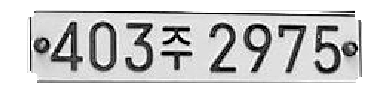

In [5]:
temp_result = gray
height, width = temp_result.shape
print(temp_result.shape)

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(temp_result,(x,y),5,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
       
       
# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)


while(1):
    cv2.imshow('image',temp_result)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
        
#     if len(points) ==4 :
#         cv2.imshow('image',temp_result)
#         height, width = temp_result[:2]
    if len(points) == 4:
        pts1 = np.float32(points)
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        M = cv2.getPerspectiveTransform(pts1,pts2)       
        dst = cv2.warpPerspective(temp_result,M,(width,height))
        dst=cv2.imshow('after',dst)
        #dst = cv2.imwrite('new_image.jpg', dst)
cv2.destroyAllWindows()

print(points)
if points[0][1] > points[1][1]:
    crop_y = points[1][1]
else:
    crop_y = points[0][1]
    
if points[0][0] > points[2][0]:
    crop_x = points[2][0]
else:
    crop_x = points[0][0]
print(crop_x)
print(crop_y)
if points[1][0] > points[3][0]:
    crop_width = points[1][0]- crop_x
else:
    crop_width = points[3][0]- crop_x
if points[2][1] > points[3][1]:
    crop_height = points[2][1] - crop_y
else:
    crop_height = points[3][1] - crop_y
print(crop_width)
print(crop_height)

crop = [crop_x, crop_y, crop_width, crop_height]
temp_result = temp_result[crop[1]:crop[1]+crop[3],crop[0]:crop[0]+crop[2]]
height, width = temp_result.shape
print(temp_result.shape)

plt.figure()
plt.imshow(temp_result, cmap='gray')

gray = temp_result

In [6]:
# print(gray.shape)
# # if (250/gray.shape[0]) >= 3:
# #     gray = cv2.resize(gray, dsize=(0,0), fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC) #cv2.INTER_LINEAR
# # else:
# if gray.shape[0]<100:
#     gray = cv2.resize(gray, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_CUBIC)
# else :
#     gray = cv2.resize(gray, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_AREA)

        
# height, width = gray.shape

# print(gray.shape)
# plt.figure()
# plt.imshow(gray, cmap='gray')

(86, 400)


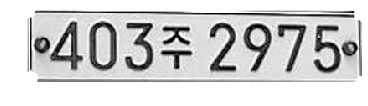

In [7]:
if gray.shape[0]<200:
    gray = cv2.resize(gray, dsize=(int(400.0),int(400.0 * height / width)), interpolation=cv2.INTER_CUBIC)
else :
    gray = cv2.resize(gray, dsize=(int(400.0),int(400.0 * height / width)), interpolation=cv2.INTER_AREA)
        
height, width = gray.shape

print(gray.shape)
plt.figure()
plt.imshow(gray, cmap='gray')

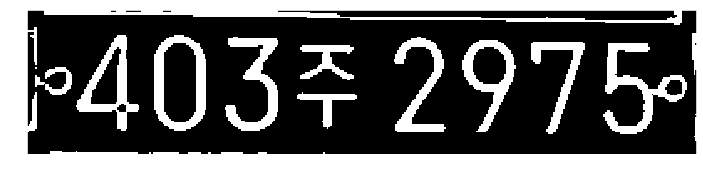

In [8]:
#img_blurred = cv2.GaussianBlur(gray, ksize=(7, 7), sigmaX=0) #ksize=5,5
img_blurred = cv2.bilateralFilter(gray, 9, 75, 75)
kernel1 = np.ones((3,3),np.uint8)
kernel2 = np.ones((6,6),np.uint8)

img_blurred = cv2.erode(img_blurred, kernel1, iterations=2)
img_blurred = cv2.dilate(img_blurred, kernel2, iterations=1)
for i in range(0,2,1):    
    img_blurred = cv2.erode(img_blurred, kernel1, iterations=1)
    img_blurred = cv2.dilate(img_blurred, kernel1, iterations=1)


img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=20 
) #block=19, c=9 #c15, b25

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')


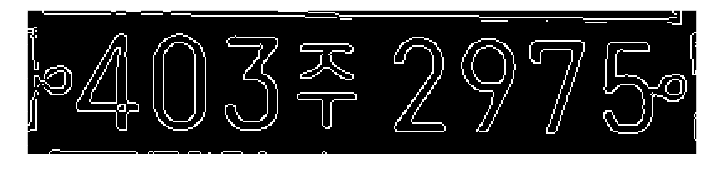

In [9]:
# Canny
img_canny = cv2.Canny(img_thresh, 190, 200) #(image, 최소 threshold, 최대, 엣지에 canny결과를 저장할 변수, )

plt.figure(figsize=(12, 10))
plt.imshow(img_canny, cmap='gray')


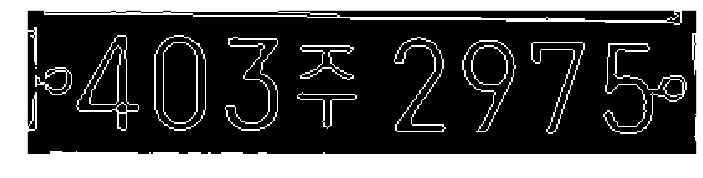

In [10]:
contours, _ = cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_TREE, 
    method=cv2.CHAIN_APPROX_SIMPLE
)#mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=1) #thick=3

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

In [11]:
# height, width, _ = temp_result.shape
# print(temp_result.shape)

# points = []

# # 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# # mouse callback function
# def draw_circle(event,x,y,flags,param):
#     if event == cv2.EVENT_LBUTTONDBLCLK:
#         global points
#         cv2.circle(temp_result,(x,y),10,(255,0,0),-1)
#         print(x,y)
#         points.append([x,y])
       
       
# # Create a black image, a window and bind the function to window
# cv2.namedWindow('image')
# cv2.setMouseCallback('image',draw_circle)

# while(1):
#     cv2.imshow('image',temp_result)
#     if cv2.waitKey(20) & 0xFF == 27: # enter ESC
#         break
#     if len(points) == 4:
#         pts1 = np.float32(points)
#         pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
#         M = cv2.getPerspectiveTransform(pts1,pts2)       
#         dst = cv2.warpPerspective(temp_result,M,(300,300))
#         dst=cv2.imshow('after',dst)
  
# # margin =10
# # crop_row_1 = (y - margin) if (y -margin) >0 else y
# # crop_row_2 = (y + height + margin) if (y + height + margin) < origin_height else y + height

# # crop_col_1 = (x - margin) if (x - margin) > 0 else x
# # crop_col_2 = (x + width + margin) if (x + width + margin) < origin_width else x + width
# cv2.destroyAllWindows() 

# print(points)
# if points[0][1] > points[1][1]:
#     crop_y = points[1][1]
# else:
#     crop_y = points[0][1]
    
# if points[0][0] > points[2][0]:
#     crop_x = points[2][0]
# else:
#     crop_x = points[0][0]
# print(crop_x)
# print(crop_y)
# if points[1][0] > points[3][0]:
#     crop_width = points[1][0]- crop_x
# else:
#     crop_width = points[3][0]- crop_x
# if points[2][1] > points[3][1]:
#     crop_height = points[2][1] - crop_y
# else:
#     crop_height = points[3][1] - crop_y
# print(crop_width)
# print(crop_height)

# crop = [crop_x, crop_y, crop_width, crop_height]


# # crop_LU = points[0]
# # crop_width = points[1][0]-points[0][0]
# # crop_height = points[2][1] - points[0][1]

# # crop_size = [crop_width, crop_height]
# # print(crop_LU)
# # print(crop_size)
# # crop= crop_LU+crop_size
# # print(crop)

# # if temp_result.shape[0]<200:
# #     img_cropped = cv2.resize(temp_result, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_CUBIC)
# # else :
# #     img_cropped = cv2.resize(temp_result, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_AREA)
        
# # height, width, _ = img_cropped.shape
# # print(img_cropped.shape)

# temp_result = temp_result[crop[1]:crop[1]+crop[3],crop[0]:crop[0]+crop[2]]
# print(temp_result.shape)

# plt.figure()
# plt.imshow(temp_result, cmap='gray')

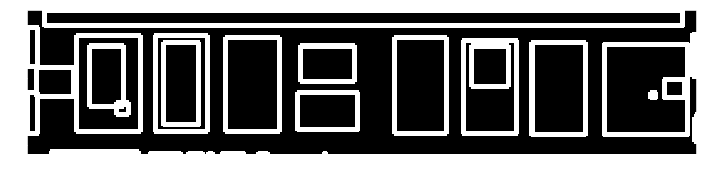

In [12]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

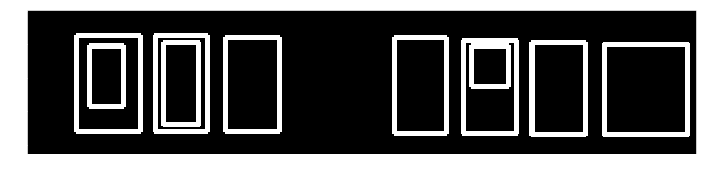

In [13]:
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 3, 8 #2, 8
MIN_RATIO, MAX_RATIO = 0.3, 1 #0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

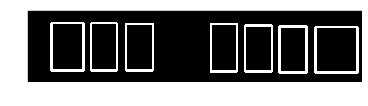

In [33]:
MAX_DIAG_MULTIPLYER = 8 # 5
MAX_ANGLE_DIFF = 20.0 # 12.0
MAX_AREA_DIFF = 0.8 #0.8 # 0.5
MAX_WIDTH_DIFF = 0.4 #0.5
MAX_HEIGHT_DIFF = 0.1
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure()
plt.imshow(temp_result, cmap='gray')

In [34]:
# PLATE_WIDTH_PADDING = 1.3 # 1.3
# PLATE_HEIGHT_PADDING = 1.5 # 1.5
# MIN_PLATE_RATIO = 3 #3
# MAX_PLATE_RATIO = 10

# plate_imgs = []
# plate_infos = []

# for i, matched_chars in enumerate(matched_result):
#     sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

#     plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
#     plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
#     plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
#     sum_height = 0
#     for d in sorted_chars:
#         sum_height += d['h']

#     plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
#     triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
#     triangle_hypotenus = np.linalg.norm(
#         np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
#         np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
#     )
    
#     angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
#     rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
#     img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
#     img_cropped = cv2.getRectSubPix(
#         img_rotated, 
#         patchSize=(int(plate_width), int(plate_height)), 
#         center=(int(plate_cx), int(plate_cy))
#     )
    
#     if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
#         continue
    
#     plate_imgs.append(img_cropped)
#     plate_infos.append({
#         'x': int(plate_cx - plate_width / 2),
#         'y': int(plate_cy - plate_height / 2),
#         'w': int(plate_width),
#         'h': int(plate_height)
#     })
    
#     plt.subplot(len(matched_result), 1, i+1)
#     plt.imshow(img_cropped, cmap='gray')

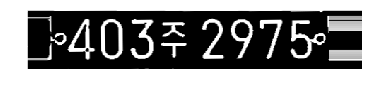

In [35]:
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO =  3#3
MAX_PLATE_RATIO = 10 #10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

In [36]:
# height, width = img_cropped.shape
# print(img_cropped.shape)

# if img_cropped.shape[0]<200:
#     img_cropped = cv2.resize(img_cropped, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_CUBIC)
# else :
#     img_cropped = cv2.resize(img_cropped, dsize=(int(200.0),int(200.0 * height / width)), interpolation=cv2.INTER_AREA)
        
# height, width = img_cropped.shape
# print(img_cropped.shape)

# plt.figure()
# plt.imshow(img_cropped, cmap='gray')

403주275


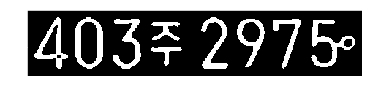

In [37]:
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.2, fy=1.2) #fx 1.6 fy =1.6
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

    chars = pytesseract.image_to_string(img_result, lang='kor', config='--psm 7 --oem 0')
    
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    print(result_chars)
    plate_chars.append(result_chars)

    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')

403주275


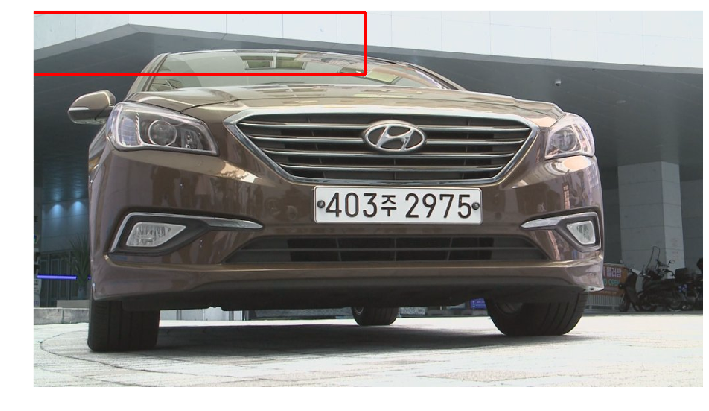

In [38]:
info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

print(chars)

img_out = img_ori.copy()

cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

cv2.imwrite(chars + '.jpg', img_out)

plt.figure(figsize=(12, 10))
plt.imshow(img_out)